# Case Study: LoanTap: Logistic Regression


# 1.0 Defining the Problem Statement

## 1.1 About the LoanTap Organisation:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.



## 1.2 Problem Statement

**Objective:**
- Develop a robust credit underwriting model for personal loans.
- Accurately predict the creditworthiness of individual loan applicants.
- Determine optimal repayment terms (e.g., loan amount, interest rate, tenure) for approved applications.

**Scope:**
- This case study focuses exclusively on the underwriting process for personal loans within the LoanTap ecosystem.
- The model will utilize a given set of applicant attributes to make credit decisions.

**Key Deliverables:**
- A predictive model that accurately classifies applicants as "creditworthy" or "not creditworthy."
- Business recommendations to optimize the lending process and minimize risk.


# 2.0 Importing the Libraries and Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !gdown https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d -O "LoanTap_dataset.csv"

In [ ]:
# df = pd.read_csv("/content/LoanTap_dataset.csv")
df = pd.read_csv("/content/LoanTap_logistic_regression.csv")

**Sampling the dataset**

In [ ]:
# Code to display all the rows and column
pd.set_option('display.max_columns', None)

In [ ]:
df.sample(5, random_state = 42)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
362323,14000.0,60 months,14.49,329.33,C,C4,mental health tech,10+ years,MORTGAGE,80000.0,Source Verified,Oct-2014,Charged Off,debt_consolidation,Debt consolidation,17.04,Jan-1989,10.0,0.0,12223.0,63.7,16.0,w,INDIVIDUAL,2.0,0.0,"557 Melvin Prairie Suite 186\r\nCherylborough,..."
220444,6050.0,36 months,16.29,213.57,D,D2,teller,2 years,OWN,20400.0,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,28.08,Mar-2004,11.0,0.0,2577.0,13.3,24.0,f,INDIVIDUAL,0.0,0.0,93333 Christopher Trafficway\r\nSouth Joshuavi...
345899,20775.0,36 months,18.24,753.57,D,D5,Business Analyst,2 years,RENT,65000.0,Source Verified,Oct-2014,Fully Paid,other,Other,15.30,Jun-2008,9.0,0.0,21872.0,36.5,10.0,f,INDIVIDUAL,0.0,0.0,"1021 Katherine Ville\r\nChristopherton, NJ 70466"
93811,6000.0,36 months,13.99,205.04,C,C4,Outreach and Enrollment,1 year,RENT,38848.0,Verified,Apr-2015,Charged Off,credit_card,Credit card refinancing,16.59,Dec-1984,17.0,4.0,6873.0,38.2,29.0,f,INDIVIDUAL,5.0,3.0,"793 Grant Key\r\nLake Janice, MD 93700"
182096,17450.0,36 months,13.11,588.89,B,B4,Pinellas county schools,8 years,MORTGAGE,65000.0,Not Verified,Mar-2013,Fully Paid,credit_card,Three years to freedom,12.06,Apr-1992,11.0,0.0,30557.0,47.8,31.0,f,INDIVIDUAL,1.0,0.0,"36882 Nicole Common\r\nLake Brian, NY 00813"


# 3.0 Exploratiry Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.shape
print(f'Total number of rows    : {df.shape[0]}')
print(f'Total number of columns : {df.shape[1]}')

Total number of rows    : 396030
Total number of columns : 27


**Key Observations**

- **Dataset Dimensions:** The dataset comprises 27 rows and 396,030 columns.
- **Data Quality:** Some columns contain null values.
- **Feature Selection:** 26 variables are identified as potential predictors for the target variable "loan_status," based on the business context.

**Next Steps**

-  **Data Quality Assessment:**
    - Calculate the percentage of missing values in each column.
    - Determine the overall percentage of missing values within the entire dataset.
    - This analysis will guide the appropriate strategies for handling null values (e.g., imputation, removal).

-  **Feature Engineering:**
    - Implement feature engineering techniques relevant to the specific business requirements.
      - This may involve:
        - Creating new features from existing ones.
        - Transforming existing features (e.g., scaling, binning, encoding categorical variables).
        - Selecting the most relevant features for the predictive model.



In [ ]:
# Function to display, only the columns with null values along with missing values count.
def missing_values():
  missing_values = df.isnull().sum()
  missing_values = missing_values[missing_values > 0].rename('Missing Values')
  return missing_values

missing_values()

,Missing Values
emp_title,22927
emp_length,18301
title,1756
revol_util,276
mort_acc,37795
pub_rec_bankruptcies,535


In [ ]:
# Function to calculate missing value percentages across each columns.
def missing_value_perc():
  missing_value_perc = np.round(100*(df.isnull().sum()/df.shape[0]),2)
  missing_value_perc = missing_value_perc[missing_value_perc > 0].rename('Missing Values Percentage')
  return missing_value_perc

missing_value_perc()

,Missing Values Percentage
emp_title,5.79
emp_length,4.62
title,0.44
revol_util,0.07
mort_acc,9.54
pub_rec_bankruptcies,0.14


**Key Observations**

- **Missing Data:** The column "mort_acc" exhibits the highest rate of missing values, approaching 10%.
- **Categorical Features:** The dataset includes six categorical columns, notably "emp_title" and "title."

**Next Steps**

- **"mort_acc" Analysis:**
  - Given its potential significance in underwriting, a thorough investigation of the "mort_acc" column is crucial.
  - This may involve:
    - Imputation strategies to handle missing values.
    - Exploratory analysis to understand its distribution and relationship with** other variables.

- **Feature Importance:**

  - Conduct a comprehensive analysis of the relationship between each independent feature and the target variable ("loan_status").
  - This will help identify the most influential predictors and guide feature selection for subsequent modeling.

In [ ]:
# Identifying unique values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts(dropna=False).sort_index())
  print("***"*10)

term
36 months    302005
60 months     94025
Name: count, dtype: int64
******************************
grade
A     64187
B    116018
C    105987
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64
******************************
sub_grade
A1     9729
A2     9567
A3    10576
A4    15789
A5    18526
B1    19182
B2    22495
B3    26655
B4    25601
B5    22085
C1    23662
C2    22580
C3    21221
C4    20280
C5    18244
D1    15993
D2    13951
D3    12223
D4    11657
D5     9700
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64
******************************
emp_title
       NSA Industries llc               1
   Fibro Source                         1
   Long Ilsand College Hospital         1
   mortgage banker                      1
  Credit rev specialist                 1
                                    ...  
zs

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [ ]:
df.select_dtypes(include='number').skew()

,0
loan_amnt,0.777285
int_rate,0.420669
installment,0.983598
annual_inc,41.042725
dti,431.051225
open_acc,1.213019
pub_rec,16.576564
revol_bal,11.727515
revol_util,-0.071778
total_acc,0.864328


# 4.0 Graphical Analysis

## 4.1 Analysis of Numerical Columns

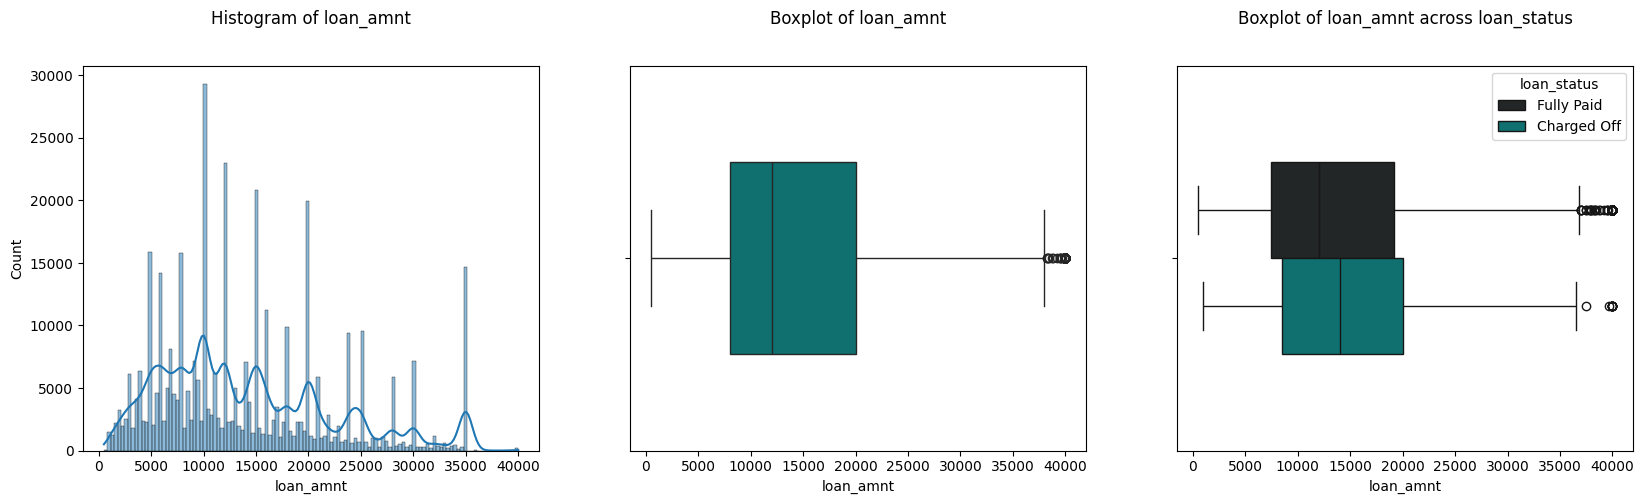

,Stat,Value
0,count,396030.000000
1,mean,14113.888089
2,std,8357.441341
3,min,500.000000
4,25%,8000.000000
5,50%,12000.000000
6,75%,20000.000000
7,max,40000.000000


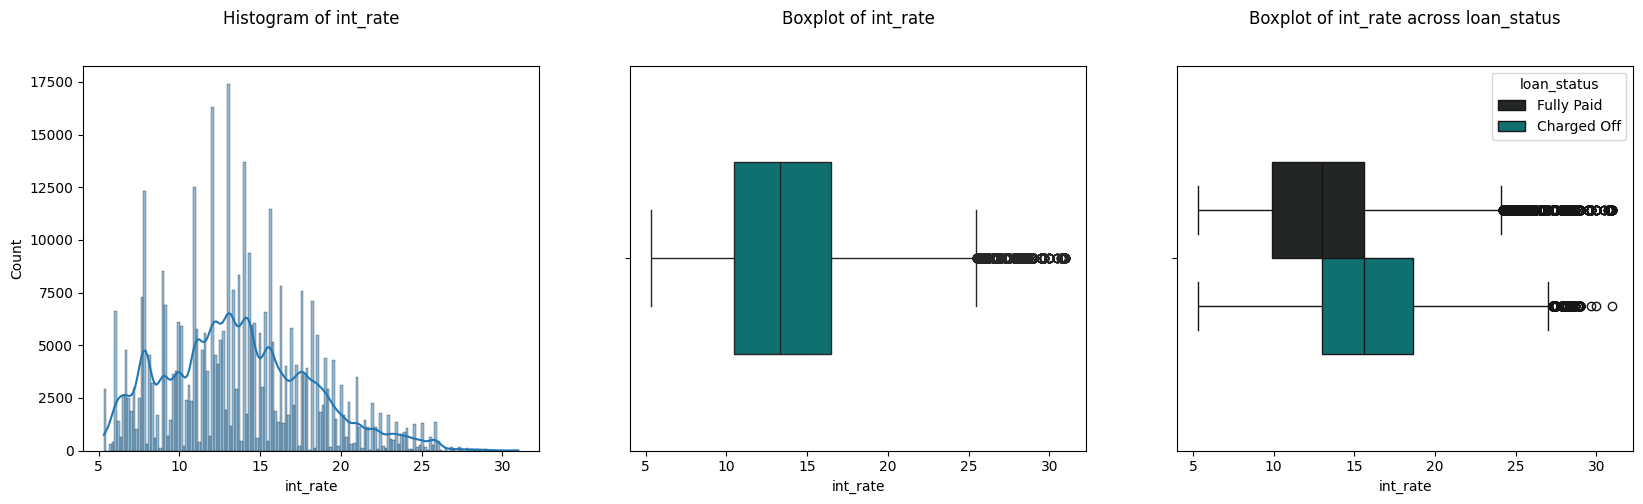

,Stat,Value
0,count,396030.000000
1,mean,13.639400
2,std,4.472157
3,min,5.320000
4,25%,10.490000
5,50%,13.330000
6,75%,16.490000
7,max,30.990000


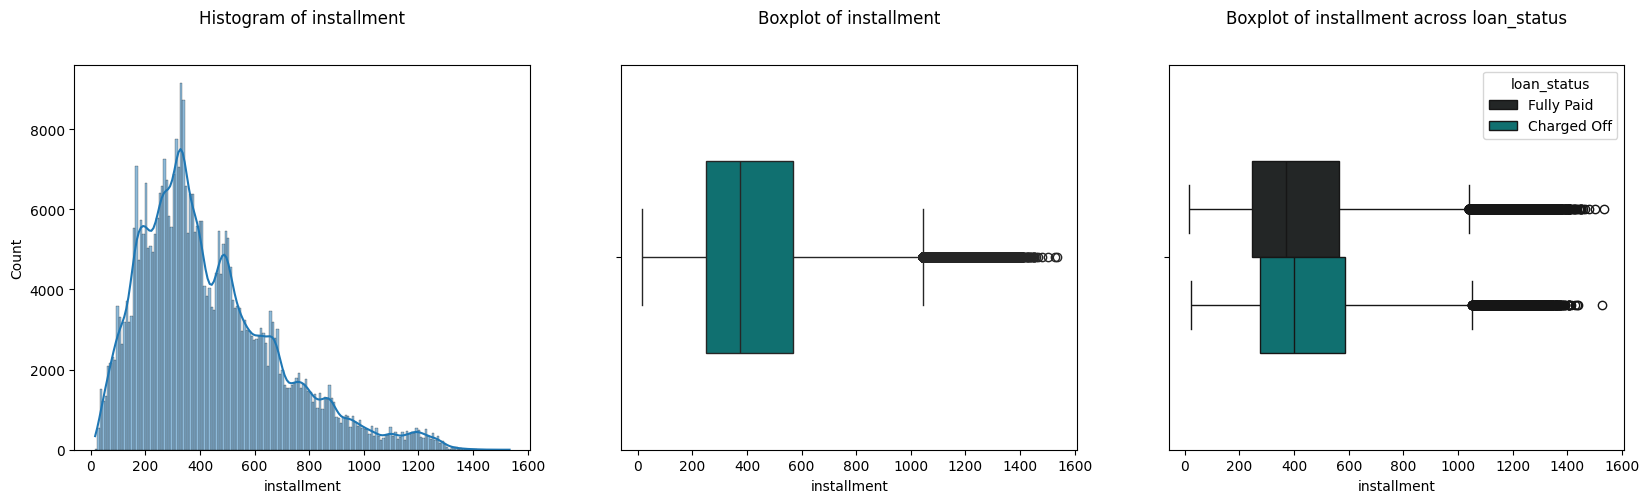

,Stat,Value
0,count,396030.000000
1,mean,431.849698
2,std,250.727790
3,min,16.080000
4,25%,250.330000
5,50%,375.430000
6,75%,567.300000
7,max,1533.810000


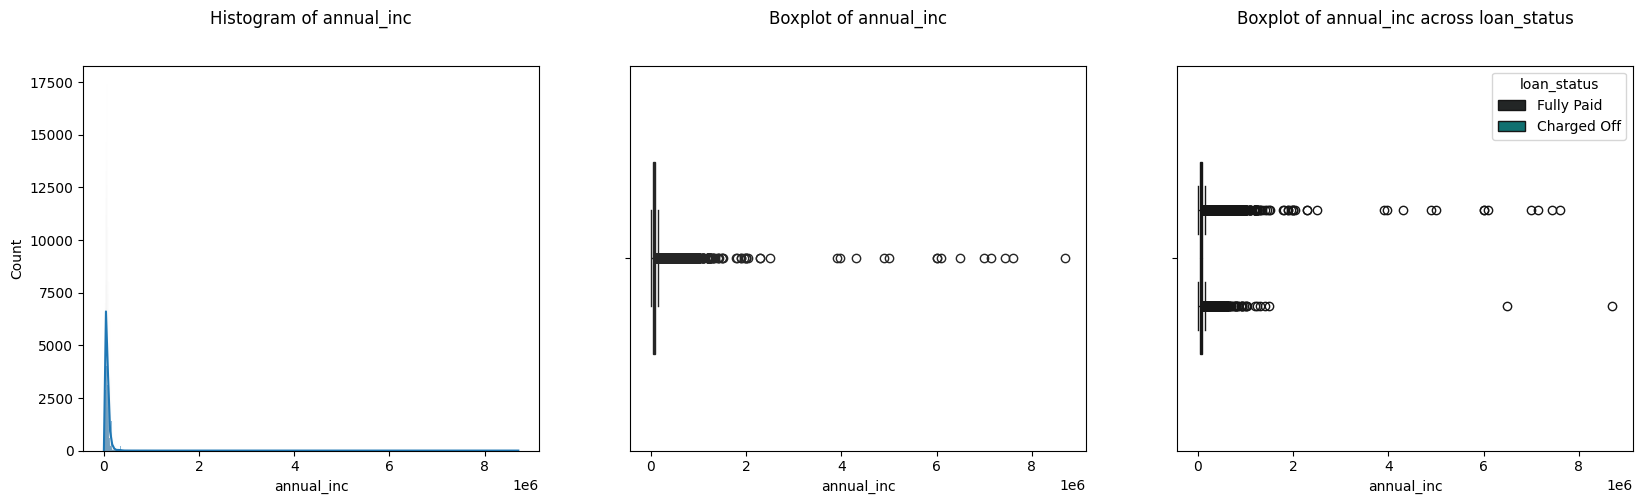

,Stat,Value
0,count,3.960300e+05
1,mean,7.420318e+04
2,std,6.163762e+04
3,min,0.000000e+00
4,25%,4.500000e+04
5,50%,6.400000e+04
6,75%,9.000000e+04
7,max,8.706582e+06


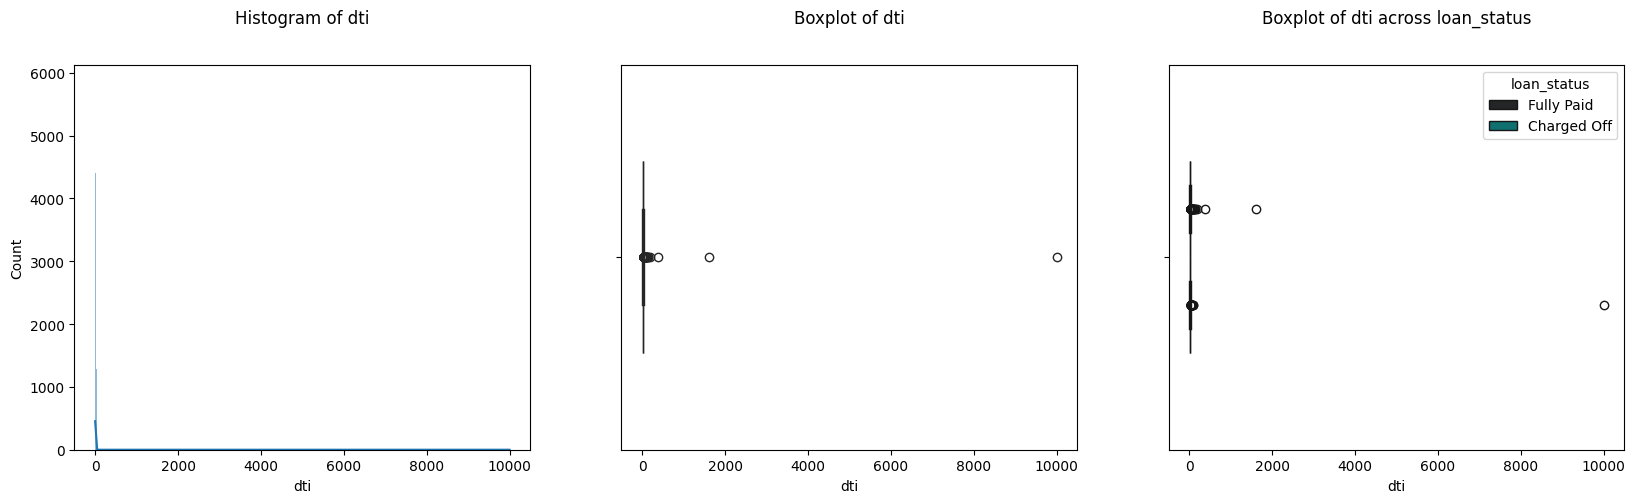

,Stat,Value
0,count,396030.000000
1,mean,17.379514
2,std,18.019092
3,min,0.000000
4,25%,11.280000
5,50%,16.910000
6,75%,22.980000
7,max,9999.000000


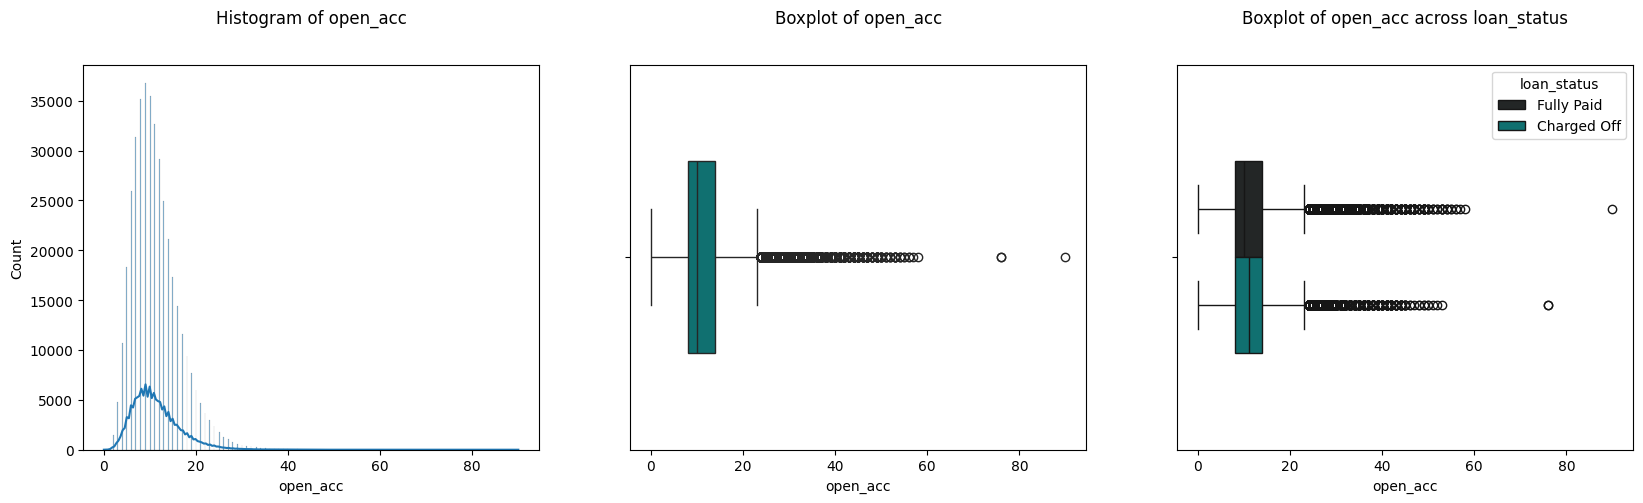

,Stat,Value
0,count,396030.000000
1,mean,11.311153
2,std,5.137649
3,min,0.000000
4,25%,8.000000
5,50%,10.000000
6,75%,14.000000
7,max,90.000000


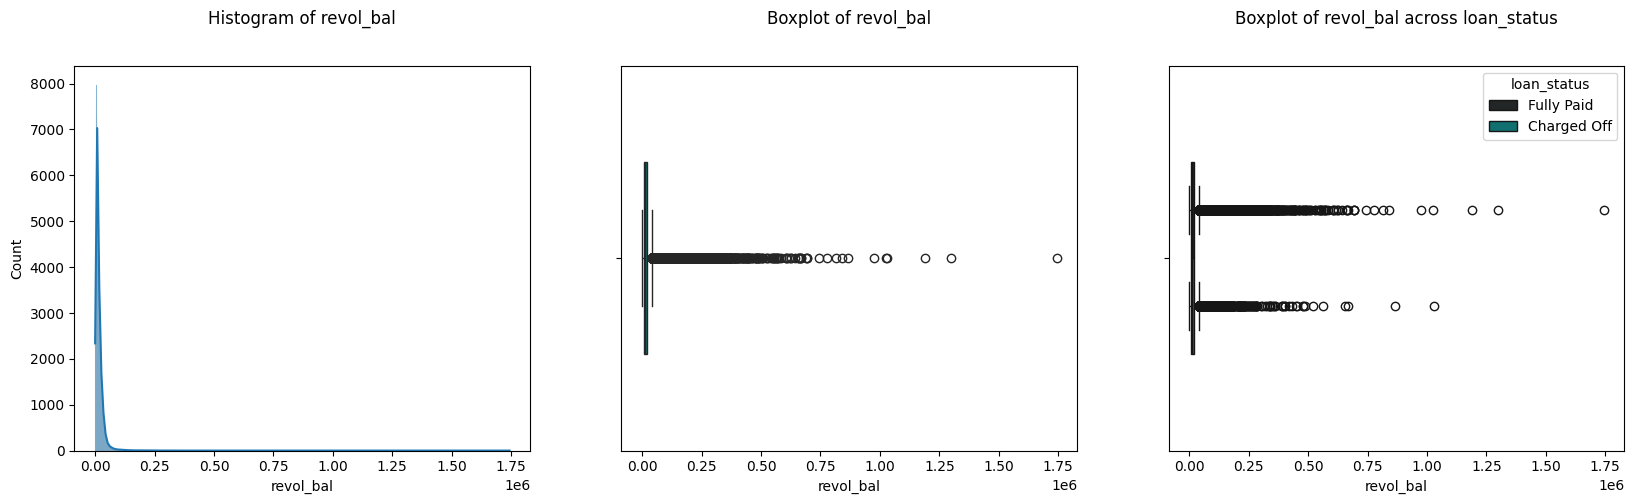

,Stat,Value
0,count,3.960300e+05
1,mean,1.584454e+04
2,std,2.059184e+04
3,min,0.000000e+00
4,25%,6.025000e+03
5,50%,1.118100e+04
6,75%,1.962000e+04
7,max,1.743266e+06


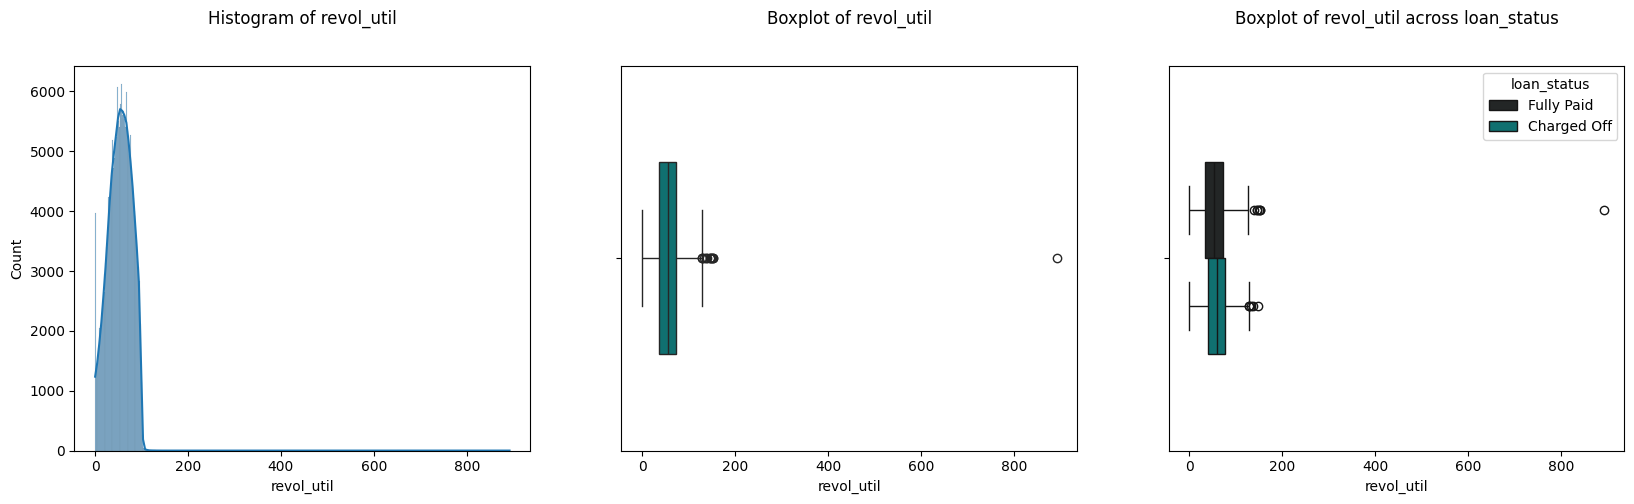

,Stat,Value
0,count,395754.000000
1,mean,53.791749
2,std,24.452193
3,min,0.000000
4,25%,35.800000
5,50%,54.800000
6,75%,72.900000
7,max,892.300000


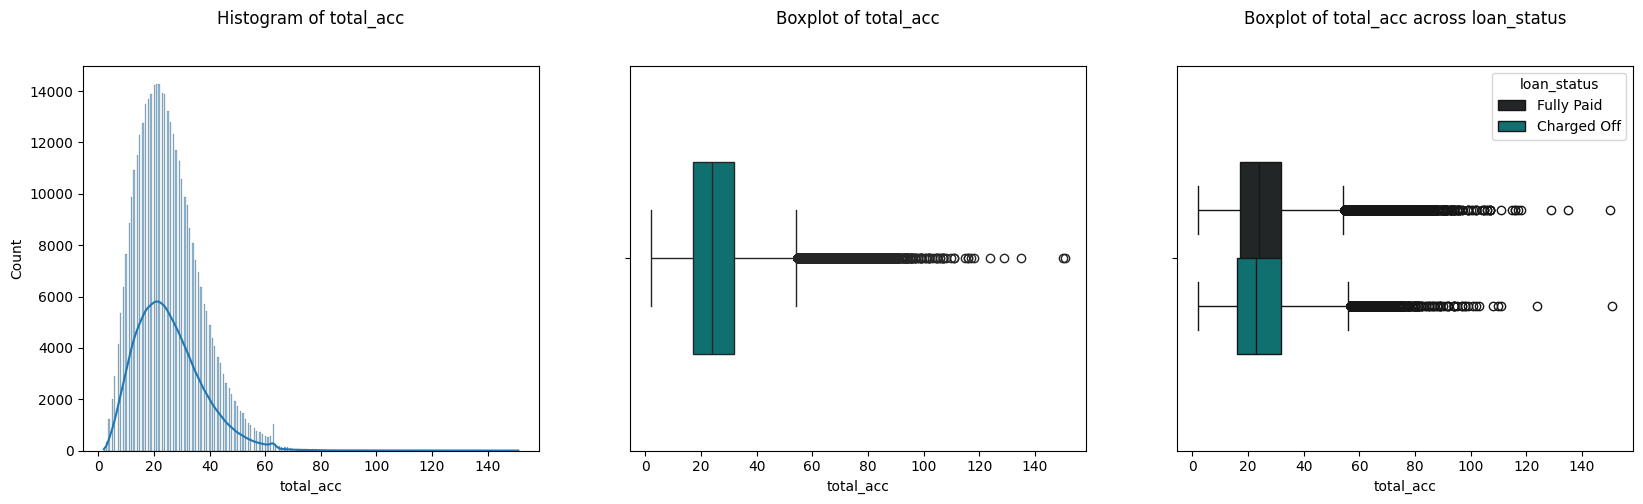

,Stat,Value
0,count,396030.000000
1,mean,25.414744
2,std,11.886991
3,min,2.000000
4,25%,17.000000
5,50%,24.000000
6,75%,32.000000
7,max,151.000000


In [ ]:
numerical =['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']

for i in numerical:
  fig, axes = plt.subplots(1,3, figsize = (20,5))
  sns.histplot(data = df, x= df[i], kde = True, ax = axes[0])
  axes[0].set_title(f"Histogram of {i}", pad = 30)
  # for j in axes[0].patches:
  #   values = j.get_height()
  #   percentage = 100 * values / len(df)
  #   axes[0].annotate(f'{values}\n({percentage:.1f}%)', (j.get_x() +
  #   j.get_width()/2, j.get_height()+3), ha='center', va='bottom', fontsize=10)
  sns.boxplot(data = df, x = df[i], ax = axes[1], width = 0.5, color='teal')
  axes[1].set_title(f'Boxplot of {i}', pad = 30)
  sns.boxplot(data = df, x = df[i], ax = axes[2], width = 0.5,  color='teal', hue = 'loan_status')
  axes[2].set_title(f'Boxplot of {i} across loan_status', pad = 30)
  plt.show()
  tab_col = pd.DataFrame(df[i].describe()).reset_index()
  tab_col.columns = ['Stat', 'Value']
  display(tab_col)

**Key Observations:**

- **Distribution:** Many of the features exhibit right-skewed distributions, indicating a concentration of values towards the lower end and a few instances with very high values (e.g., loan_amnt, int_rate, installment, annual_inc, dti, revol_bal, revol_util, open_acc, total_acc).
- **Outliers:** Outliers are present in most of the features, particularly on the higher end of the value ranges. These outliers could potentially skew the analysis and should be carefully investigated.
- **Loan Status Impact:**
  - int_rate and dti show a strong association with loan status, with "Charged Off" loans generally having higher interest rates and DTI ratios.
  - revol_util also exhibits a strong association with loan status, with higher credit utilization rates being more likely to result in charge-offs.
  - Other features like loan_amnt, installment, annual_inc, open_acc, revol_bal, and total_acc show some relationship with loan status, but the differences between "Charged Off" and "Fully Paid" loans are less pronounced.

**Next Steps:**

  - **Outlier Treatment:**
    - Investigate the causes of outliers in each feature.
    - Consider appropriate outlier treatment strategies, such as:
      - Removal (if justified and after careful analysis)
      - Capping (setting extreme values to a reasonable limit)
    


## 4.2 Analysis of Categorical Columns

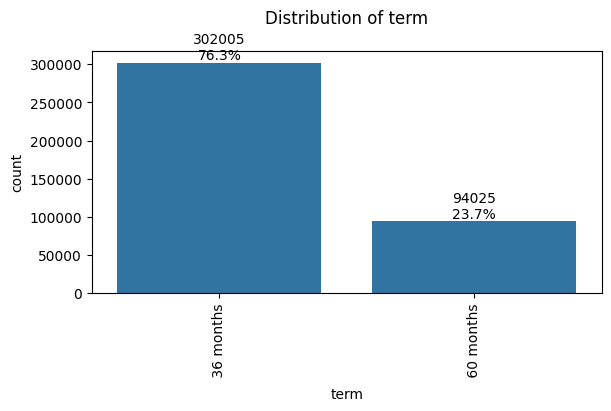

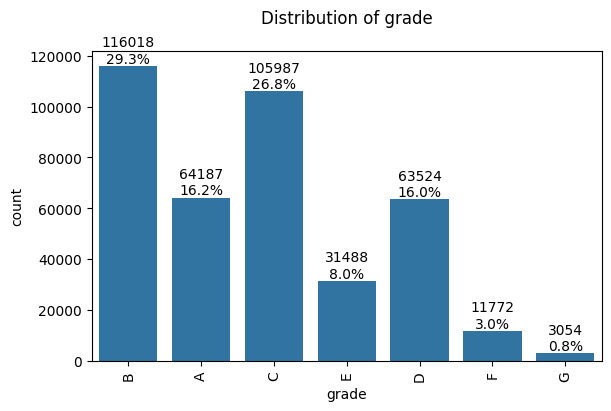

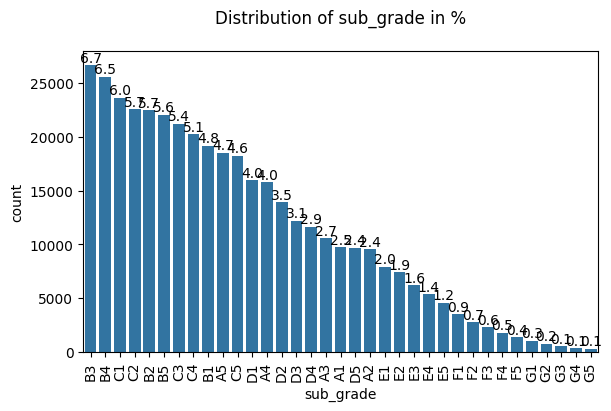

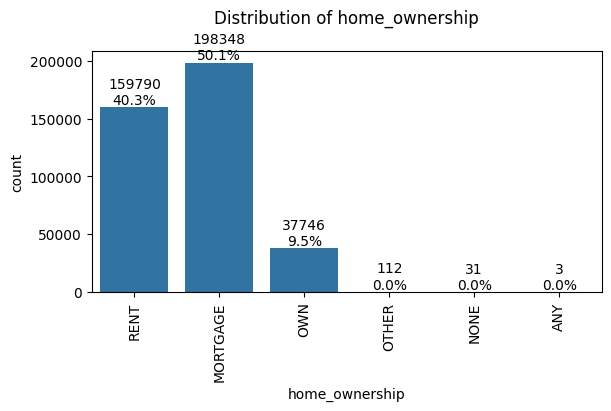

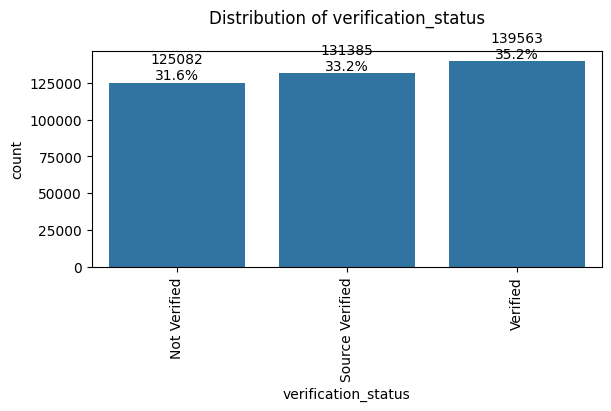

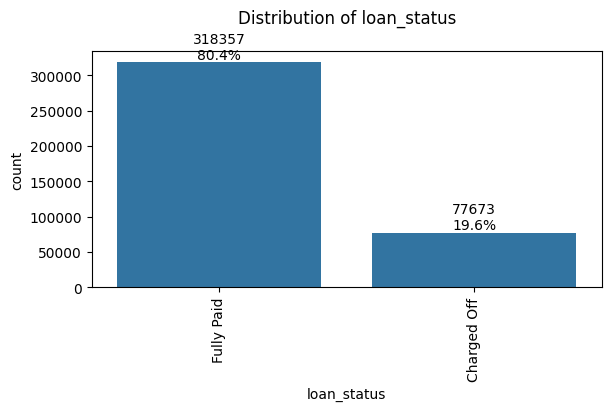

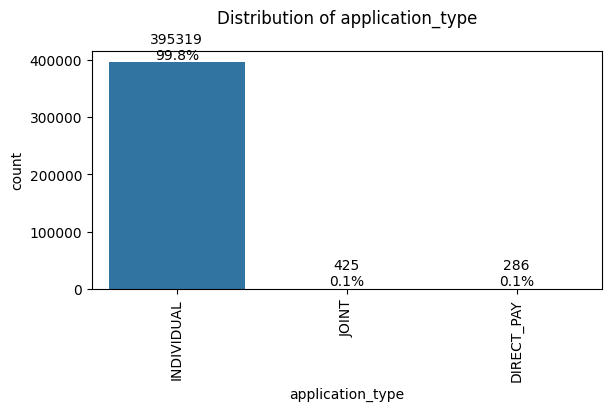

In [ ]:
categorical = ['term', 'grade','sub_grade','home_ownership', 'verification_status','loan_status','application_type']
x




**Key Observations:**

  - **Loan Term Preference:** A 36-month loan term is significantly preferred over a 60-month term, accounting for approximately 76% of loans.
  - **Grade Distribution:** Borrowers are predominantly concentrated in grades C and B, while grade G represents a very small proportion (0.8%).
  - **Subgrade Distribution:** The subgrade distribution follows a similar pattern to the grade distribution, with each grade further subdivided into five groups, exhibiting a declining frequency.
  - **Home Ownership:** "Mortgage" is the most common home ownership status, accounting for 50% of borrowers. "Rent" is the second most prevalent status.
  - **Verification Status:** Approximately one-third of applicants have not verified their income.
  - **Loan Performance:** 80.4% of loans have been "Fully Paid," while 19.6% have been "Charged Off."
  - **Application Type:** The vast majority (99.8%) of applications are submitted by individuals.

**Next Steps:**
  - **Investigate the Impact of Non-Verified Income:**
    - Analyze the relationship between non-verified income status and loan performance across different customer segments.
    - Determine if non-verified income applicants have a higher likelihood of loan default.

## 4.3 Important features across the Target variable

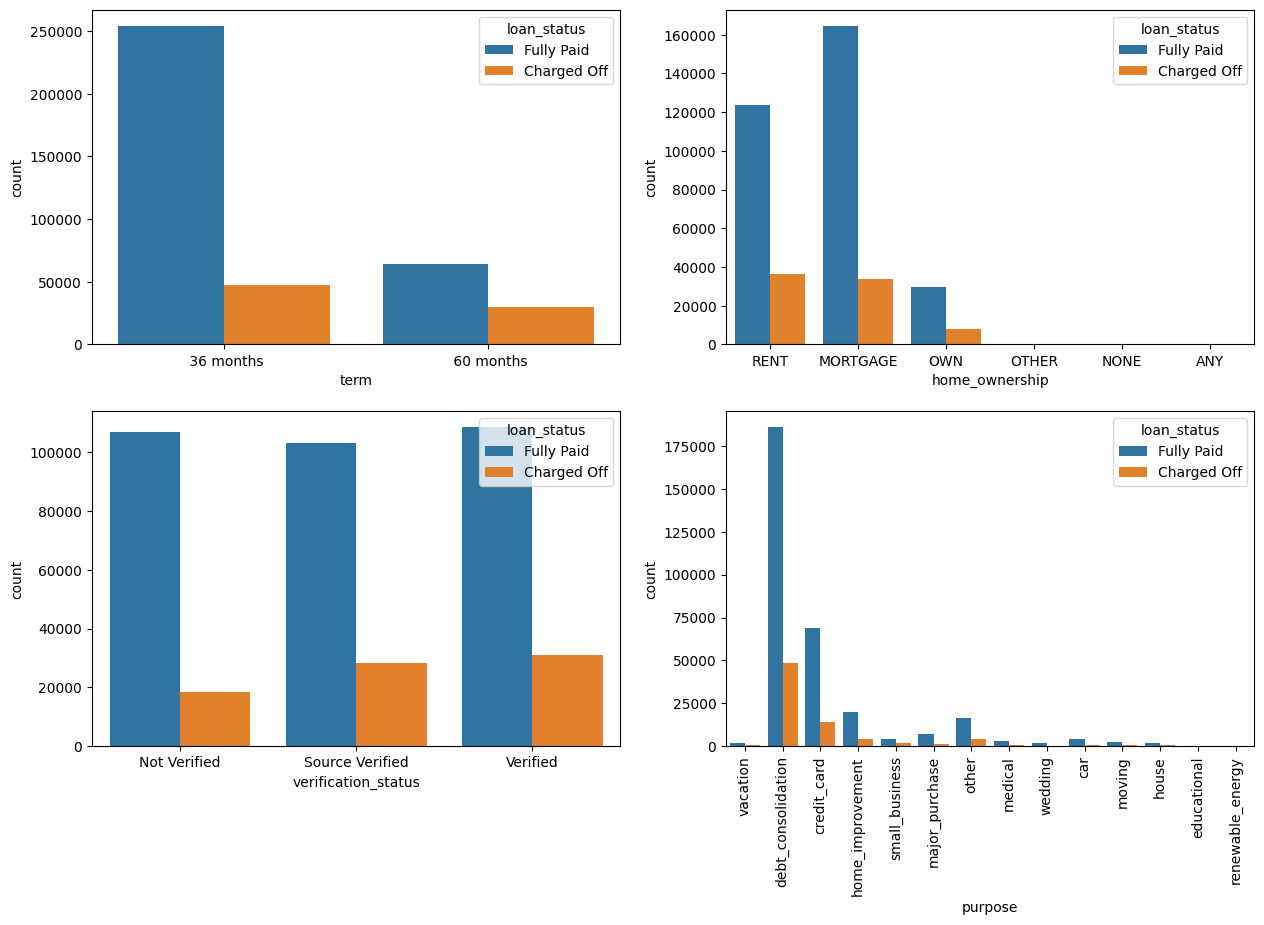

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

**Key Observations:**

  - **Term:** A clear preference for shorter loan terms is evident, with 36-month terms being significantly more common than 60-month terms. This preference also seems to be associated with lower default rates.

  - **Home Ownership:** Borrowers with mortgages have the highest number of loans, followed by renters. Homeowners appear to have slightly lower default rates compared to renters.

  - **Verification Status:** A substantial portion of borrowers have not verified their income. While this category has a higher number of loans, it also shows a slightly less proportion of defaults compared to "Source Verified" and "Verified" income.

  - **Purpose:** The primary purpose for loans is "debt consolidation," followed by "credit card" and "home improvement." Loans taken for "debt consolidation" and "small business" appear to have higher default rates.

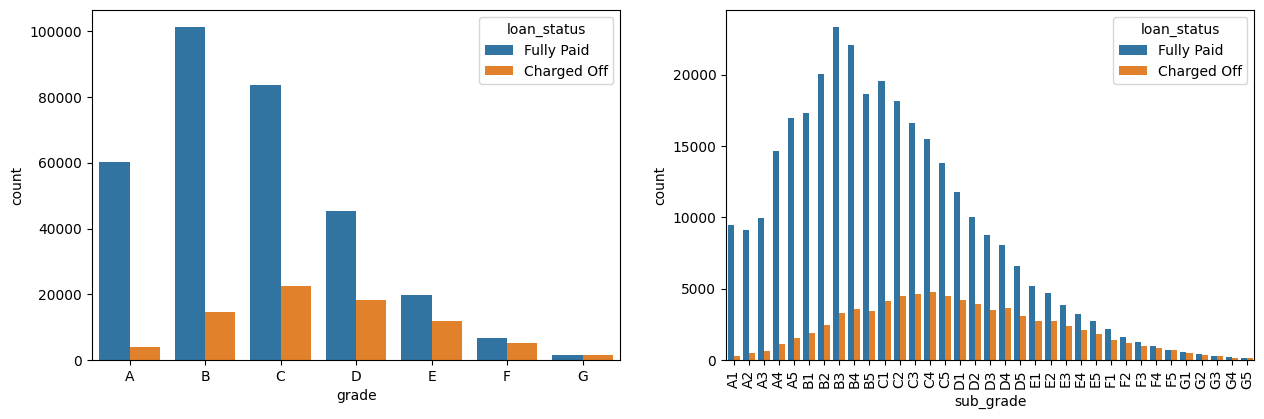

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

# **Key Observations:**

  - **Grade Distribution & Default Rates:**
    - Grade C has the highest number of loans, followed by grade B.
    - Grades A and G have the lowest number of loans.
    - Default rates appear to increase with decreasing grade (from A to G). Grades G and F have the highest default rates.

  - **Sub-grade Distribution & Default Rates:**
    - The distribution of loans across sub-grades follows a similar pattern to the grade distribution.
    - Within each grade, the default rate generally increases as the sub-grade letter moves further down the alphabet (e.g., A1 to A5).
    - Sub-grades G5 and F5 have the highest default rates.

<Axes: >

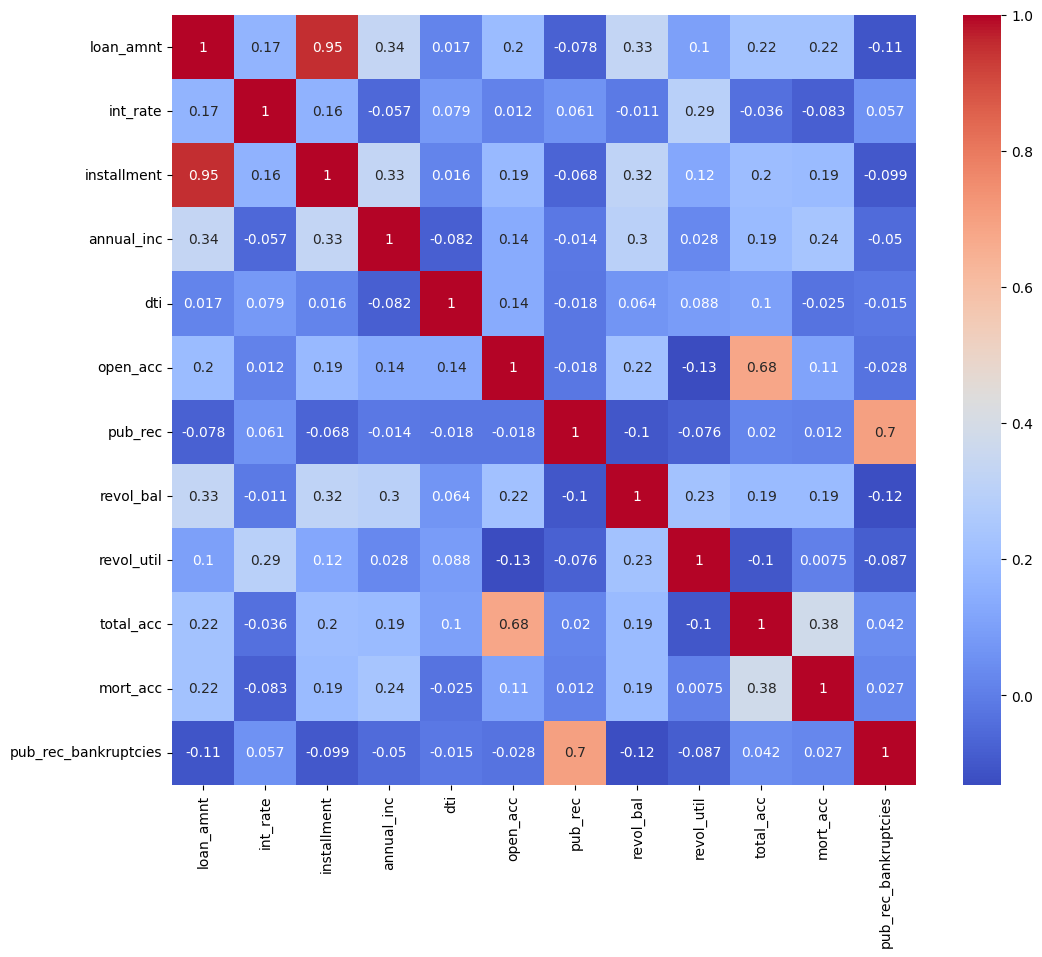

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.select_dtypes("number").corr(), annot =True, cmap = 'coolwarm')

# 5.0 Data Preprocessing

**Duplicate Value check**

In [ ]:
df.duplicated().sum()

0

## 5.1 Handling the Missing values

###5.1.1 Making an informed decision on handling the missing values

**Can we drop the records with null values**

In [ ]:
missing_value_perc()


,Missing Values Percentage
emp_title,5.79
emp_length,4.62
title,0.44
revol_util,0.07
mort_acc,9.54
pub_rec_bankruptcies,0.14


**Key Observations**
- The "mort_acc" column has the highest percentage of missing values compared to other columns in the dataset.

**Next Steps**
- Calculate Impact of Dropping "mort_acc" Rows:
  - Determine the percentage of data that would be lost if rows with missing values in the "mort_acc" column are dropped.
  - Assess the potential impact of data loss on the analysis and model building.

### 5.1.2 Null records percentage across the dataset

Records with null values if dropped will constitute to 15.19% of the overall dataset
Dropping the records is not the best strategy yet


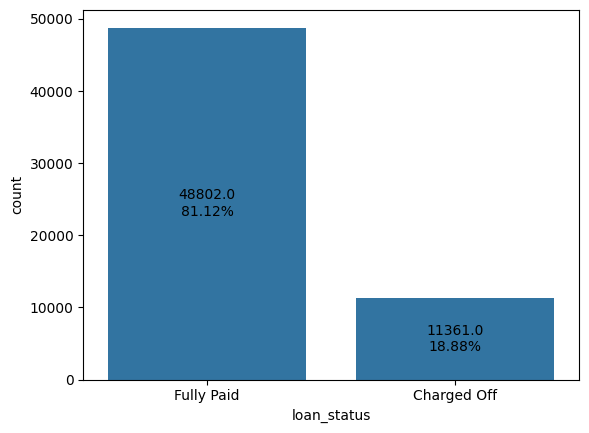

In [ ]:
# Function to calculate the missing records percentage across the dataset
def missing_records(target):
  missing_records = df[df.isnull().any(axis=1)]
  plt = sns.countplot(data = missing_records, x = missing_records[target])
  a = np.round(100 * len(missing_records)/len(df),2)
  print(f'Records with null values if dropped will constitute to {a}% of the overall dataset')
  if a > 5:
    print('Dropping the records is not the best strategy yet')
  else:
    print('We can go ahead and drop the records as we have enough records')
  for i in plt.patches:
    values = i.get_height()
    percentage = 100 * values/len(missing_records)
    plt.annotate(f'{values}\n{percentage:.2f}%', (i.get_x() + i.get_width()/2, i.get_height()/2), ha = 'center', va = 'center', fontsize = 10)


missing_records('loan_status')

**Key Observations**
- The distribution of missing records closely mirrors the overall distribution of the loan_status variable, suggesting that imputation using central tendencies could be a viable strategy.
- Dropping the missing records is not feasible due to the significant percentage (15.19%) they constitute. Instead, a hybrid approach of selective imputation can be explored to reduce the overall percentage of missing data.

**Next Steps**
1. Prioritize Columns with High Missing Percentages
  - Focus on handling the top contributors to missing data, starting with emp_title, title, and mort_acc.
2. Imputation Strategies
  - Categorical Variables (emp_title, title): Impute missing values with "Unknown" instead of the mode since these variables will not be included in model training.
  - Numerical Variable (mort_acc): Impute missing values using central tendencies (mean or median), as it constitutes a significant 9.54% of the data.
  - Ordinal Variable (emp_length): Replace missing values with 0, as this variable will be excluded from the final model.
3. Iterative Approach
  - After addressing the key contributors to missing data, reassess the overall missing record percentage. If the percentage drops below a reasonable threshold, consider removing any residual records with missing values.

###**5.1.3 Data Imputation**

In [ ]:
df.loc[df['emp_title'].isnull(),'emp_title'] = 'Unknown'
df.loc[df['title'].isnull(),'title'] = 'Unknown'
df.loc[df['emp_length'].isnull(),'emp_length'] = 0
missing_value_perc()

,Missing Values Percentage
revol_util,0.07
mort_acc,9.54
pub_rec_bankruptcies,0.14


In [ ]:
total_acc_avg=df.groupby(by='total_acc').mort_acc.mean()
# saving mean of mort_acc according to total_acc_avg
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)
missing_value_perc()

,Missing Values Percentage
revol_util,0.07
pub_rec_bankruptcies,0.14


##5.2 Reassesing the Missing records percentage after handling major contributors.

Records with null values if dropped will constitute to 0.2% of the overall dataset
We can go ahead and drop the records as we have enough records


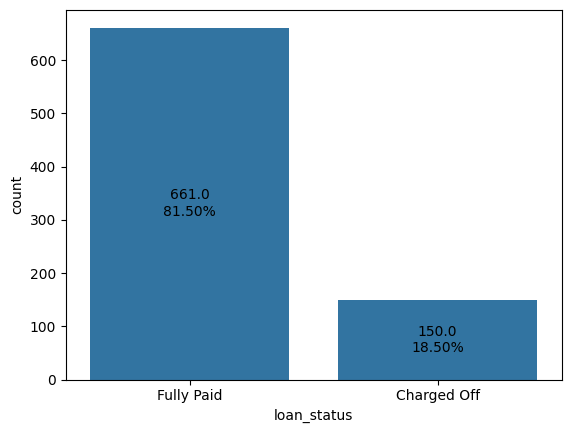

In [ ]:
missing_records('loan_status')

In [ ]:
df.dropna(inplace= True)
missing_value_perc()

,Missing Values Percentage


##5.3 Handling the Outlier values

### 5.3.1 Outlier Detection


In [ ]:
numerical = df.select_dtypes(include = 'number').columns
categorical = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'application_type']

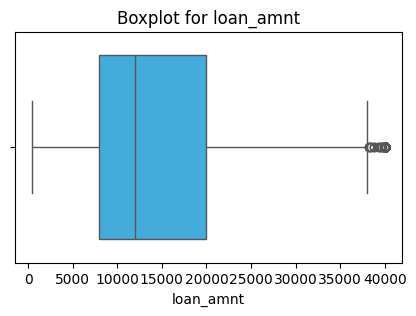

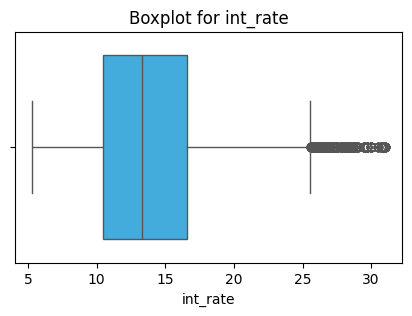

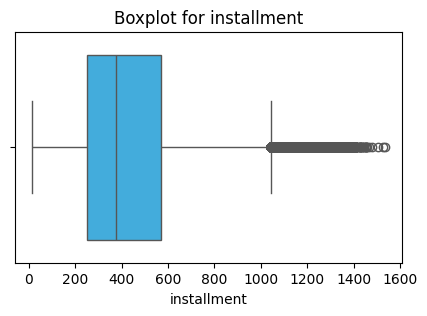

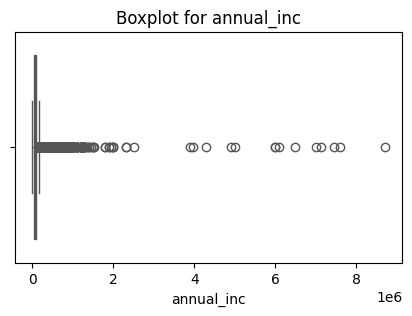

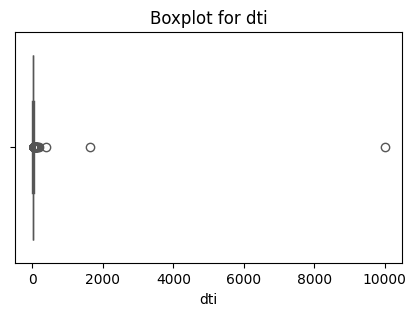

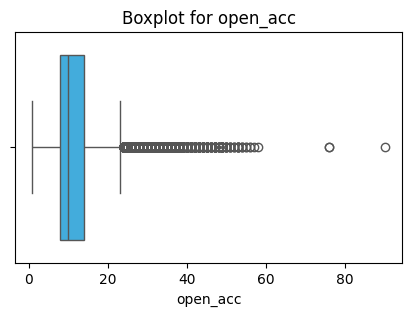

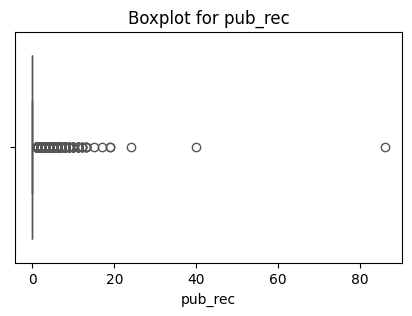

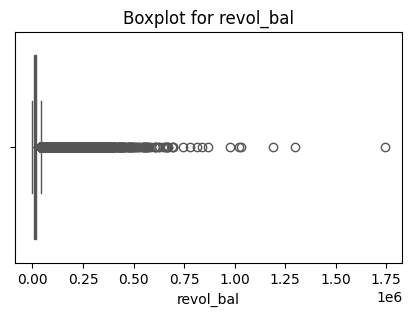

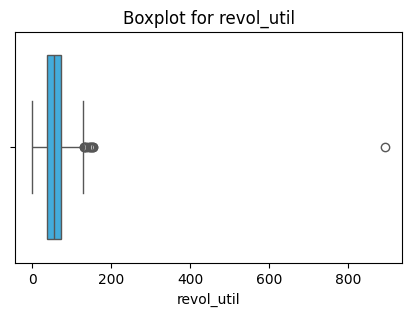

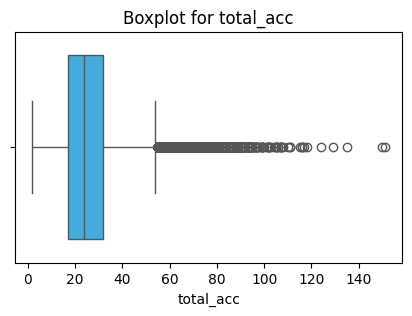

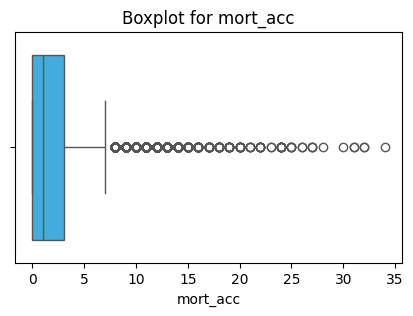

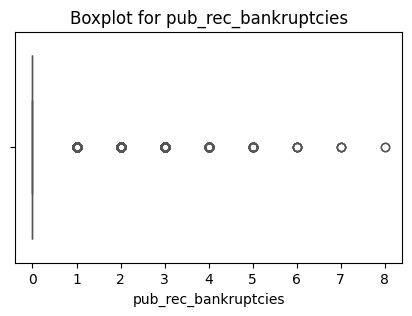

In [ ]:
def box_plot(col):
    if col in df.columns:
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=df[col],color="#29B6F6")
        plt.title('Boxplot for {}'.format(col))
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

for col in numerical:
    box_plot(col)

In [ ]:
df.select_dtypes(include = 'number').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

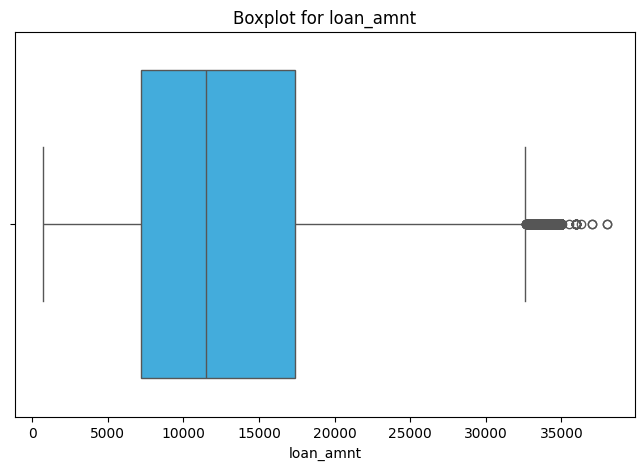

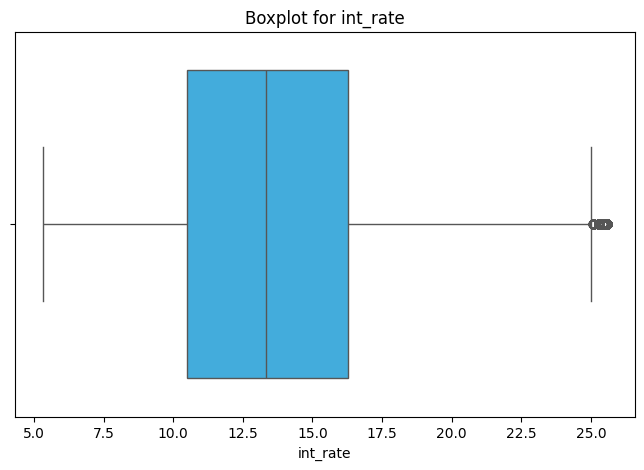

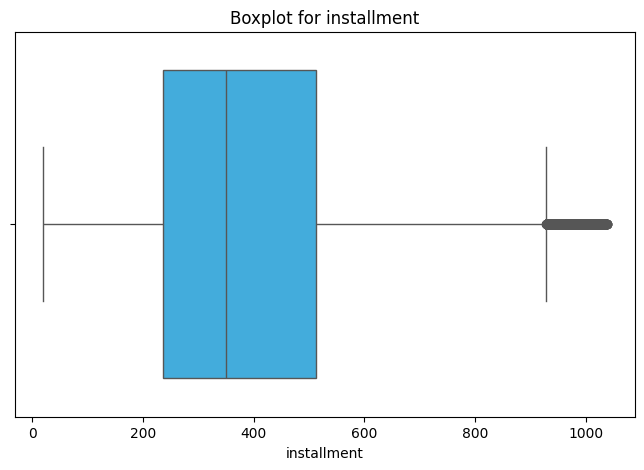

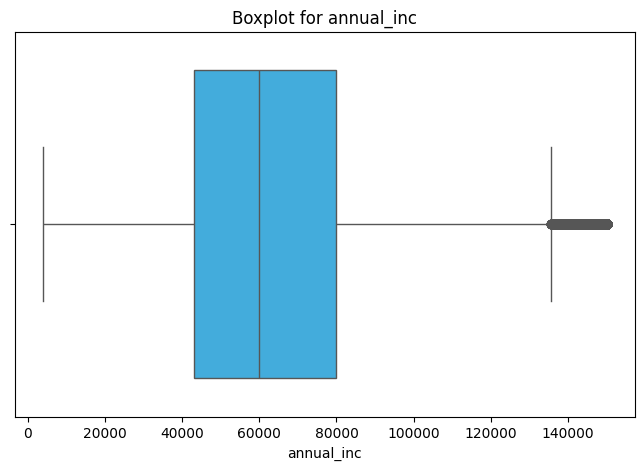

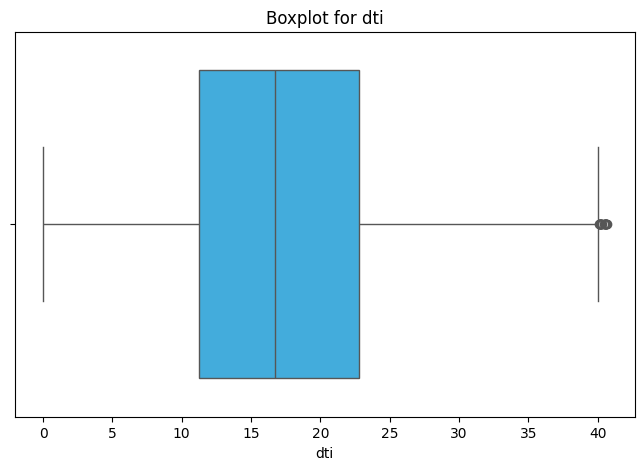

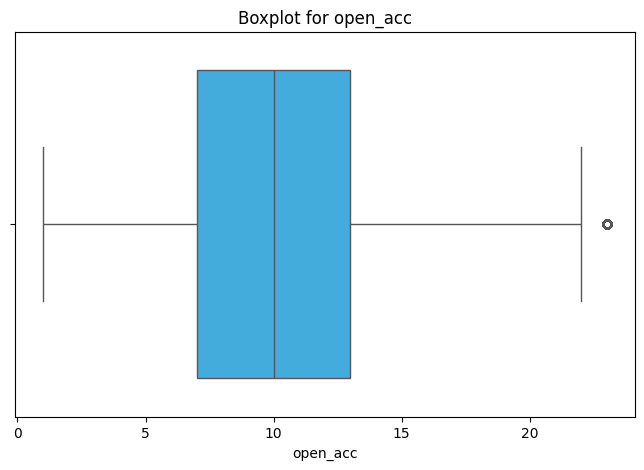

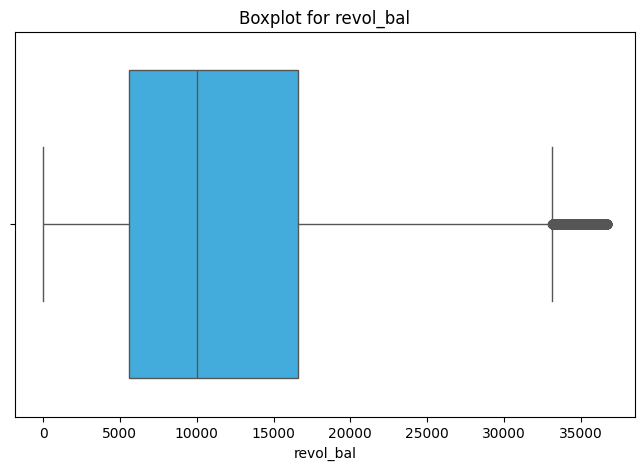

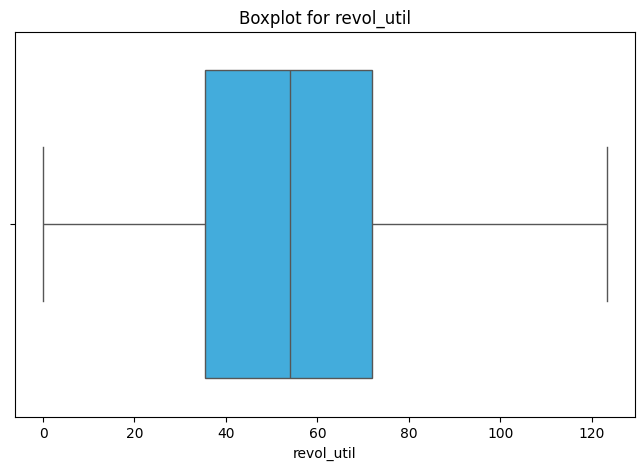

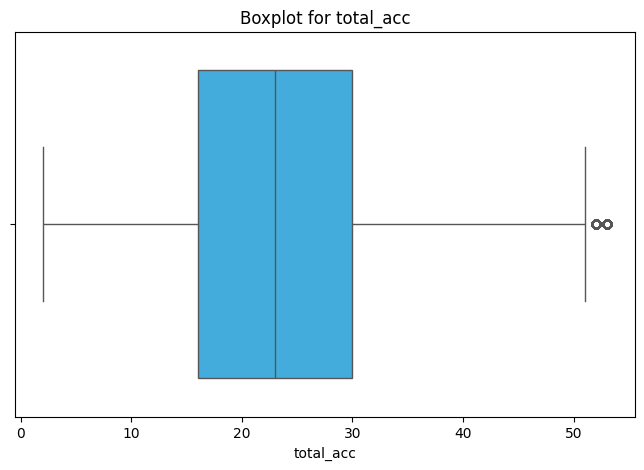

(334559, 27)

In [ ]:
# Outlier treatment
new_num_cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
for col in new_num_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

def box_plot(col):
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col],color="#29B6F6")
        plt.title('Boxplot for {}'.format(col))
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

for col in new_num_cols:
    box_plot(col)
df.shape

###5.3.2 Feature Engineering

**Imputing values for categorical variables**

In [ ]:
df['pub_rec'] = [1 if i > 1 else 0 for i in df['pub_rec']]
df['mort_acc'] = [1 if i > 1 else 0 for i in df['mort_acc']]
df['pub_rec_bankruptcies'] = [1 if i > 1 else 0 for i in df['pub_rec_bankruptcies']]

**Mapping values and Type Casting Features appropriately**

In [ ]:
df['term'] = df['term'].replace({' 36 months': 36, ' 60 months': 60}).astype(int)
df['loan_status'] = df['loan_status'].replace({'Fully Paid':0, 'Charged Off':1}).astype(int)
df['initial_list_status'] = df['initial_list_status'].replace({'f': 1, 'w': 0}).astype(int)

years = {'10+ years':10, '4 years':4, '< 1 year':0, '6 years':6, '9 years':9,'2 years':2, '3 years':3,'8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length']=df['emp_length'].replace(years).astype(int)


**Deriving impactful Features from present features**

In [ ]:
# converting the earliest_cr_line column into month and year

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d_month'] = df['earliest_cr_line'].dt.month
df['issue_d_year'] = df['earliest_cr_line'].dt.year

df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
124376,9000.0,36,12.29,300.18,C,C1,Driver,2,RENT,35136.0,Verified,2015-10-01,0,debt_consolidation,Debt consolidation,19.74,1994-10-01,7.0,0,7272.0,64.4,10.0,0,INDIVIDUAL,0,0,"PSC 9457, Box 5666\r\nAPO AE 29597",10,1994,10,1994
385087,12200.0,36,9.99,393.61,B,B4,DZI Global Inc.,5,RENT,36000.0,Not Verified,2010-11-01,0,debt_consolidation,Lowering My Credit Card Bills,20.07,1999-02-01,11.0,0,28394.0,47.7,21.0,1,INDIVIDUAL,1,0,"19604 Kyle Prairie Suite 781\r\nFloresburgh, S...",2,1999,2,1999
13107,10000.0,36,11.99,332.10,B,B5,Registered Nurse,10,MORTGAGE,70000.0,Not Verified,2015-02-01,0,debt_consolidation,Debt consolidation,16.03,1997-08-01,15.0,0,18011.0,75.4,37.0,0,INDIVIDUAL,0,0,85090 Richards Meadows Suite 759\r\nNorth Heat...,8,1997,8,1997


**Splitting the address column**

In [ ]:
df[['state', 'zip_code']] = df['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 334559 entries, 0 to 396029
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   loan_amnt               334559 non-null  float64       
 1   term                    334559 non-null  int64         
 2   int_rate                334559 non-null  float64       
 3   installment             334559 non-null  float64       
 4   grade                   334559 non-null  object        
 5   sub_grade               334559 non-null  object        
 6   emp_title               334559 non-null  object        
 7   emp_length              334559 non-null  int64         
 8   home_ownership          334559 non-null  object        
 9   annual_inc              334559 non-null  float64       
 10  verification_status     334559 non-null  object        
 11  issue_d                 334559 non-null  datetime64[ns]
 12  loan_status             334559 non-

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_d_month', 'issue_d_year', 'state',
       'zip_code'],
      dtype='object')

**Dropping unwanted columns**

In [ ]:
columns = ['sub_grade', 'emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address', 'earliest_cr_line_month', 'earliest_cr_line_year', 'issue_d_month', 'issue_d_year', 'state']
df.drop(columns=columns, inplace=True)

**Encoding Variables**

In [ ]:
dummies=['grade','home_ownership', 'verification_status', 'purpose', 'application_type', 'zip_code']

data=pd.get_dummies(df,columns=dummies,drop_first=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# 6.0 Model Building

##6.1 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop('loan_status',axis=1)
y = data['loan_status']

# stratify to balance the data during the split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=42)

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')
x_train.sample(3, random_state = 42)

x_train: (234191, 52)
x_test: (100368, 52)
y_train: (234191,)
y_test: (100368,)


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
262278,16000.0,60,12.99,363.97,10,57000.0,13.98,7.0,0,13914.0,44.2,22.0,0,1,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
319937,16625.0,60,18.25,424.43,10,51500.0,33.23,9.0,0,15922.0,67.5,18.0,0,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
91200,7000.0,36,9.75,225.05,0,63000.0,9.03,6.0,0,292.0,1.7,18.0,0,0,0,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Importing stats libraries

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'zip_code_05113', 'zip_code_11650',
       'zip_code_22690', 'zip_code_29597', 'zip_code_30723', 

##6.2 Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_train_columns = x_train.columns
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


##6.3 Training the Logistic Regression Model

### Model 1: Training the unbalanced model after preprocessing.

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(model.score(x_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.889


[[80168   506]
 [10609  9085]]


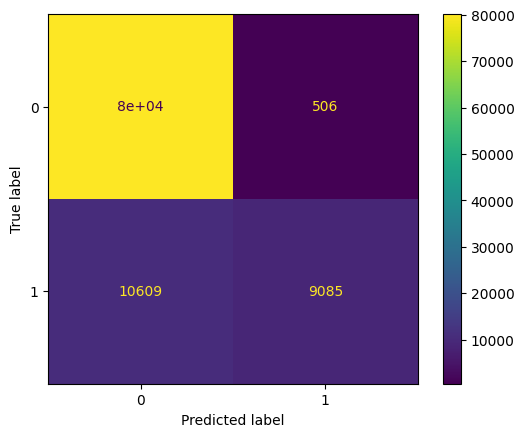

In [ ]:
#Plot confusion Matrix
confusion_matrix = confusion_matrix(y_test,y_pred)

print(confusion_matrix)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_).plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     80674
           1       0.95      0.46      0.62     19694

    accuracy                           0.89    100368
   macro avg       0.92      0.73      0.78    100368
weighted avg       0.90      0.89      0.87    100368



**ROC Curve**

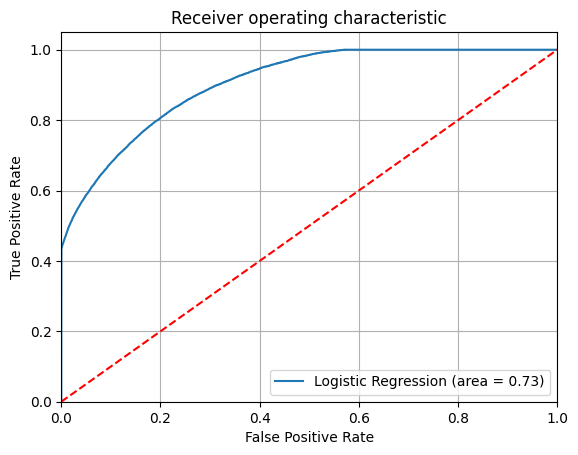

In [ ]:
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Precision-Recall Curve**

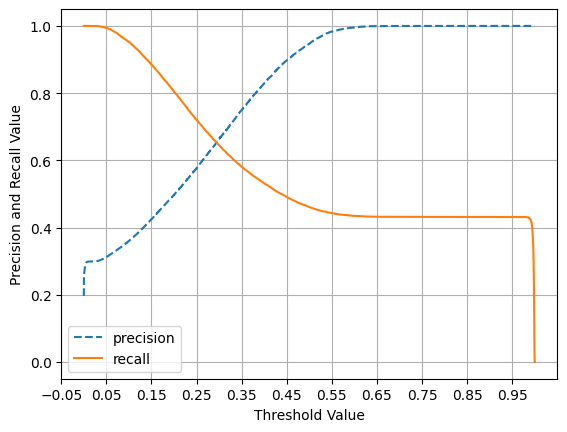

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, model.predict_proba(x_test)[:, 1])

threshold_boundary = thresholds.shape[0]

# Plot precision
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')

# Plot recall
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.xlabel('Threshold Value')
plt.ylabel('Precision and Recall Value')
plt.legend()
plt.grid()
plt.show()

#### Model Interpretability

In [ ]:
model.score(x_train, y_train)

0.8889666981224726

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
f1


0.6204541574184737

In [ ]:
len((model.coef_)[0])

52

In [ ]:
len(x.columns)

52

In [ ]:
imp = pd.DataFrame(list(zip(x.columns,np.abs(model.coef_[0]))),
                   columns=['feature', 'coeff'])
imp = imp.sort_values(by='coeff', ascending=False)
imp

,feature,coeff
51,zip_code_93700,12.120141
44,zip_code_11650,12.110739
50,zip_code_86630,12.014185
46,zip_code_29597,8.746250
43,zip_code_05113,8.742120
48,zip_code_48052,4.696756
49,zip_code_70466,4.665408
47,zip_code_30723,4.665069
45,zip_code_22690,4.652905
42,application_type_JOINT,2.655026


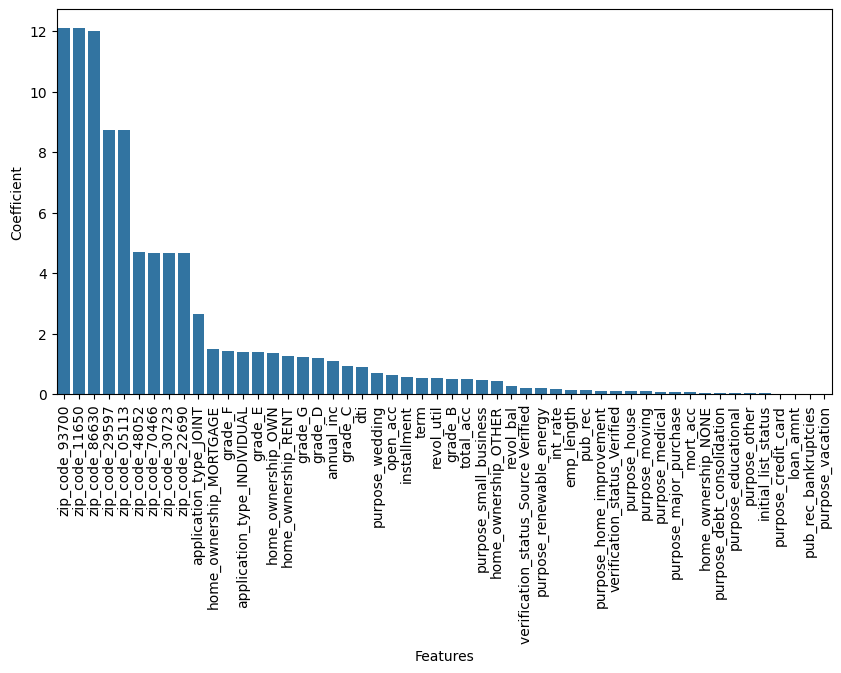

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=imp.feature, y='coeff', data=imp)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)
plt.show()

In [ ]:
x.columns[np.argmax(np.abs(model.coef_))]

'zip_code_93700'

In [ ]:
x.columns[np.argmin(np.abs(model.coef_))]

'purpose_vacation'

So,
- `year` is most important feature,
- while `manual` is the least important.

**Validation**

In [ ]:
x=scaler.fit_transform(x)

kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(model,x,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.889


### Model 2: Re-Training after oversampling the imbalanced data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_sm ,y_sm = sm.fit_resample(x_train,y_train)



In [ ]:
print('Before SMOTE')
print(y_train.value_counts())
print('\n')
print('After Oversampling')
print(y_sm.value_counts())

Before SMOTE
loan_status
0    188240
1     45951
Name: count, dtype: int64


After Oversampling
loan_status
0    188240
1    188240
Name: count, dtype: int64


In [ ]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(x_sm, y_sm)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lr1.predict(x_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(lr1.score(x_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.798


[[64156 16518]
 [ 3773 15921]]


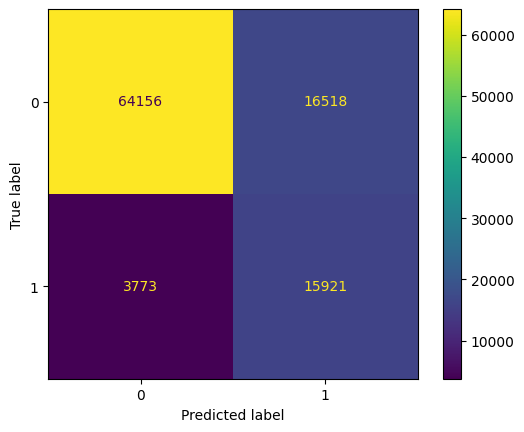

In [ ]:
#Plot confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr1.classes_).plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     80674
           1       0.49      0.81      0.61     19694

    accuracy                           0.80    100368
   macro avg       0.72      0.80      0.74    100368
weighted avg       0.86      0.80      0.81    100368



**ROC Curve**

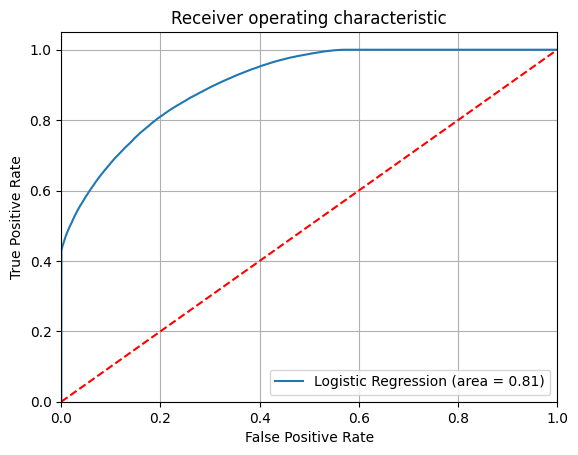

In [ ]:
logit_roc_auc = roc_auc_score(y_sm, lr1.predict(x_sm))

fpr, tpr, thresholds = roc_curve(y_sm, lr1.predict_proba(x_sm)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Precision Recall Curve**

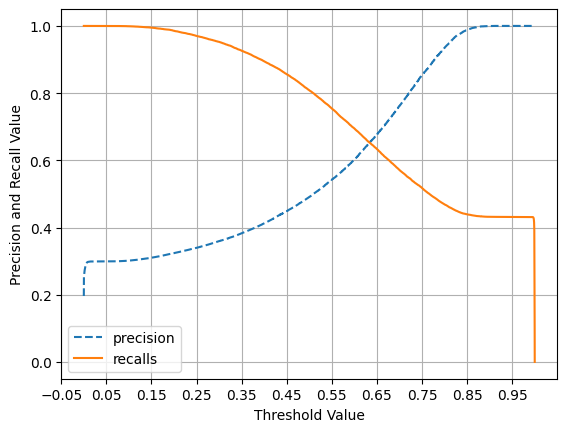

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr1.predict_proba(x_test)[:,1])

#### Model Interpretability

In [ ]:
lr1.score(x_sm, y_sm)

0.8050148746281343

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
f1


0.6107839564191587

In [ ]:
len((lr1.coef_)[0])

52

In [ ]:
imp = pd.DataFrame(list(zip(x_train_columns,np.abs(lr1.coef_[0]))),
                   columns=['feature', 'coeff'])
imp = imp.sort_values(by='coeff', ascending=False)
imp

,feature,coeff
44,zip_code_11650,13.713803
51,zip_code_93700,13.706281
50,zip_code_86630,13.515730
46,zip_code_29597,11.478334
43,zip_code_05113,11.476029
48,zip_code_48052,5.917488
47,zip_code_30723,5.888397
45,zip_code_22690,5.885856
49,zip_code_70466,5.885732
42,application_type_JOINT,2.828304


####**Comparitive Model Analysis between model 1 and 2**

**Key Metric Comparisons**

  - **True Positive Rate (Recall)**
    - Previous Model: 46.13%	New Model: 80.84%

  - **True Negative Rate (Specificity)**
    - Previous Model: 99.37%	New Model: 79.52%

  - **False Positive Rate (FPR)**
    - Previous Model: 0.63%	New Model: 20.48%

  - **False Negative Rate (FNR)**
    - Previous Model: 53.87%	New Model: 19.16%

**Key Observations**

- **Recall (TPR):**
  - The new model is far better at detecting positive cases (80.84% vs. 46.13%). If detecting risky loans is critical, this model is more suitable.

- **Specificity (TNR):**
  - The new model loses its ability to correctly classify negative cases, dropping from 99.37% to 79.52%. This could lead to operational inefficiencies or unnecessary restrictions for borrowers.

### Model 3: Retraining the model after Regularization

In [ ]:

#Try with different regularization factor lamda and choose the best to build the model

lamb = np.arange(0.01, 10000, 10)

train_scores = []
test_scores = []

for lam in lamb:
    model = LogisticRegression(C = 1/lam)
    model.fit(x_sm, y_sm)

    tr_score = model.score(x_sm, y_sm)
    te_score = model.score(x_test, y_test)

    train_scores.append(tr_score)
    test_scores.append(te_score)

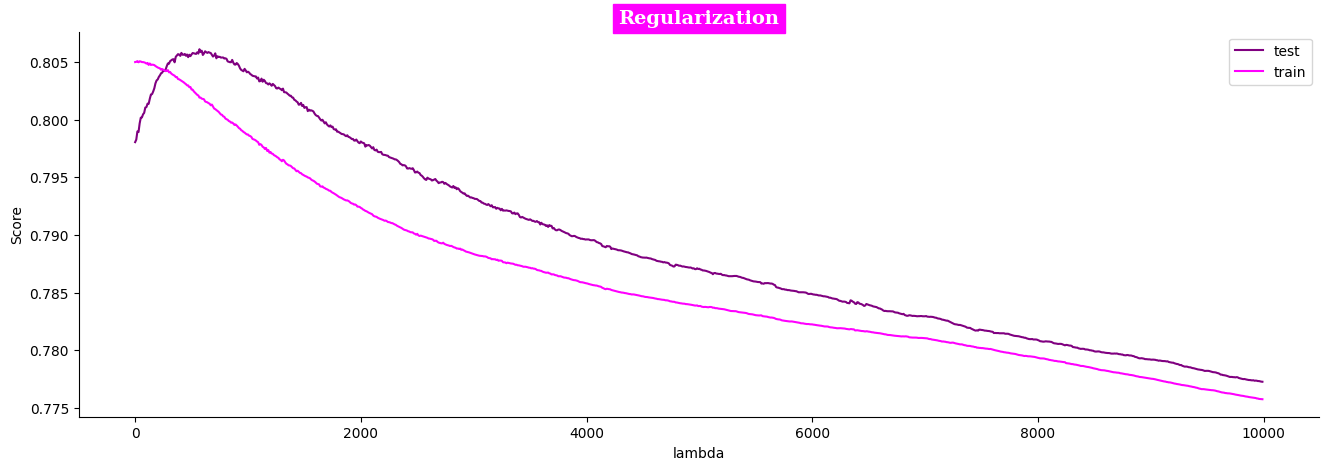

In [ ]:
#Plot the train and test scores with respect lambda values i.e. regularization factors
ran = np.arange(0.01, 10000, 10)
plt.figure(figsize=(16,5))
sns.lineplot(x=ran,y=test_scores,color='purple',label='test')
sns.lineplot(x=ran,y=train_scores,color='magenta',label='train')
plt.title('Regularization',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='magenta',color='w')
plt.xlabel("lambda")
plt.ylabel("Score")
sns.despine()
plt.show()

In [ ]:
#Check the index of best test score and the check the best test score
a = np.argmax(test_scores)
print(np.argmax(test_scores))
print(test_scores[np.argmax(test_scores)])

57
0.8061135023114937


In [ ]:
#Calculate the best lambda value based on the index of best test score

best_lamb = 0.01 + (10*a)
best_lamb

570.01

In [ ]:

#Fit the model using best lambda

reg_model = LogisticRegression(C=1/best_lamb)
reg_model.fit(x_sm, y_sm)

LogisticRegression(C=0.0017543551867511096)

In [ ]:
y_reg_pred = reg_model.predict(x_test)
y_reg_pred_proba = reg_model.predict_proba(x_test)

In [ ]:
#Print model score

print(f'Logistic Regression Model Score with best lambda: ',end='')
print(round(reg_model.score(x_test, y_test)*100,2),'%')

Logistic Regression Model Score with best lambda: 80.61 %


[[65346 15328]
 [ 4132 15562]]


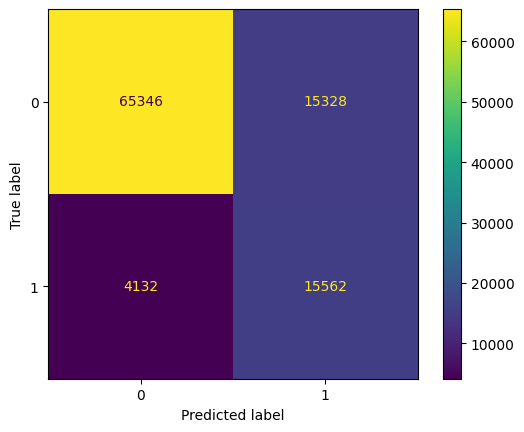

In [ ]:
#Plot confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_reg = confusion_matrix(y_test, y_reg_pred)

print(cm_reg)

ConfusionMatrixDisplay(confusion_matrix=cm_reg, display_labels=reg_model.classes_).plot()

In [ ]:
print(classification_report(y_test,y_reg_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     80674
           1       0.50      0.79      0.62     19694

    accuracy                           0.81    100368
   macro avg       0.72      0.80      0.74    100368
weighted avg       0.85      0.81      0.82    100368



**ROC Curve**

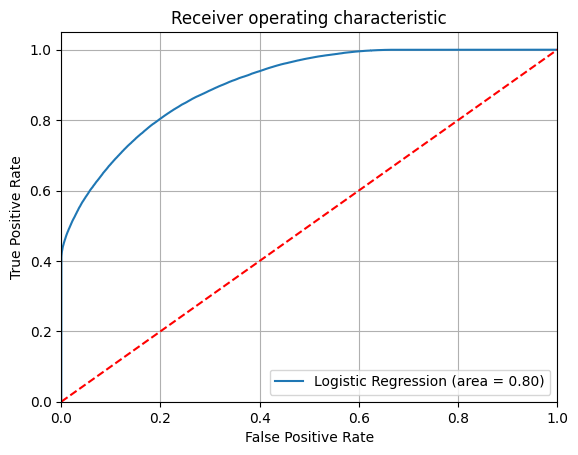

In [ ]:
logit_roc_auc = roc_auc_score(y_sm, reg_model.predict(x_sm))

fpr, tpr, thresholds = roc_curve(y_sm, reg_model.predict_proba(x_sm)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Precision Recall Curve**

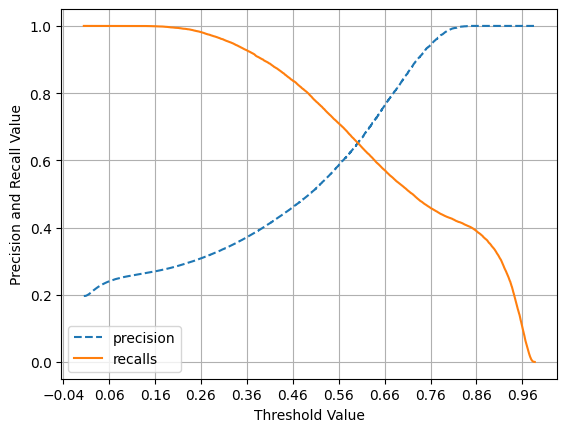

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, reg_model.predict_proba(x_test)[:,1])

#### Model Interpretability

In [ ]:
reg_model.score(x_sm, y_sm)

0.8019151083722907

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_reg_pred)
f1

0.6152933733987032

In [ ]:
len((model.coef_)[0])

52

In [ ]:
imp = pd.DataFrame(list(zip(x_train_columns,np.abs(reg_model.coef_[0]))),
                   columns=['feature', 'coeff'])
imp = imp.sort_values(by='coeff', ascending=False)
imp

,feature,coeff
51,zip_code_93700,3.544363
44,zip_code_11650,3.544143
50,zip_code_86630,3.499020
46,zip_code_29597,1.985616
43,zip_code_05113,1.985040
48,zip_code_48052,1.053550
47,zip_code_30723,1.027828
49,zip_code_70466,1.024588
45,zip_code_22690,1.023873
5,annual_inc,0.924410


# **7.0 Model Comparison of 1, 2 and 3**

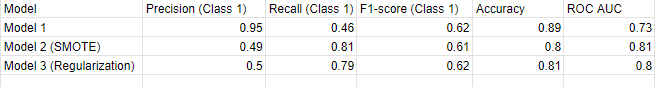

**Trade-off Analysis**

- **Model 1:**
  - Strengths: High accuracy and precision for the majority class (class 0).
  - Weaknesses: Low recall for the minority class (class 1), indicating a high number of false negatives. This model might be biased towards the majority class due to class imbalance.

- **Model 2 (SMOTE):**
  - Strengths: Improved recall for the minority class (class 1) compared to Model 1. This suggests that SMOTE effectively addressed the class imbalance issue.
  - Weaknesses: Lower precision for the minority class, indicating a higher number of false positives. Accuracy also decreased compared to Model 1.

- **Model 3 (Regularization):**
  - Strengths: Similar performance to Model 2 in terms of recall for the minority class.
  - Weaknesses: Slightly lower precision for the minority class compared to Model 2.

**Comprehensive outlook on models**
  - There is no significant difference in the performance metrics of model 2 and 3. So we can go ahead with Model 2.
  - The model 2 prioritizes minimizing false negatives at the expense of increasing false positives. Whether this is acceptable depends on the business's tolerance for false positives.

**Which Model is Better?**
  - If recall is critical (e.g., identifying risky loans to reduce default rates), the model 2 is better.
  - If specificity and minimizing false positives are more important (e.g., ensuring good customer experience by not falsely flagging loans), the model 1 is preferable.

# **8.0 Insights:**

  - **Class Imbalance:** The dataset exhibits significant class imbalance, with the majority class (class 0) dominating predictions. This imbalance skews model performance and reduces the ability to detect minority class (class 1) instances effectively.

  - **SMOTE Impact:** SMOTE addressed class imbalance by generating synthetic samples for the minority class, improving recall but increasing false positives.

  - **Regularization Impact:** Regularization helped mitigate overfitting but did not significantly improve recall compared to SMOTE.

  - **Model Trade-off:** The new model (using SMOTE or regularization) achieved better recall but at the cost of increased false positives, highlighting the inherent trade-off between recall and specificity.

  - **Business Implications:** The choice of model should depend on whether false positives (e.g., unnecessary loan rejections) or false negatives (e.g., missed risky loans) have a greater financial or operational impact.

**Recommendations:**

  - Explore creating or transforming features to provide the model with better predictive power.

  - Incorporate feedback from end-users or collaborate with domain experts to better understand the real-world implications of false positives and false negatives.

  - Regularly monitor model performance in production and retrain it with updated data to prevent performance degradation over time.

  - Collect more relevant data to reduce the influence of majority classes and set up automated alerts for performance drops.

  - Maintain thorough documentation of changes, updates, and performance metrics for transparency and accountability.



In [ ]:
def colab2pdf():

  # @title Download Notebook in PDF Format{display-mode:'form'}

  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;

  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);

  %matplotlib inline

  def convert(b):

    try:

      s.value='🔄 Converting';b.disabled=True

      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))

      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)

      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]

      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")

      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]

      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)

      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))

      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)

      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet

      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'

    except Exception as e:s.value=f'❌ {str(e)}'

    finally:b.disabled=False

  if not pathlib.Path('/usr/local/bin/quarto').exists():

    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb

  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))

colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>